In [178]:
import os 

In [179]:
%pwd

'C:\\Users\\RICH-FILES\\Desktop\\ml\\AI-powered-Bank-Product-Recommender-Chatbot'

In [180]:
os.chdir("../.")

In [181]:
%pwd

'C:\\Users\\RICH-FILES\\Desktop\\ml'

In [182]:
project_dir = "C:/Users/RICH-FILES/Desktop/ml/AI-powered-Bank-Product-Recommender-Chatbot"
os.chdir(project_dir)

In [183]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataTransformationConfig:
    """
    Data Transformation Configuration
    """
    root_dir: Path
    transformed_data_file: Path
    customer_path: Path
    product_path: Path
    train_data_file: Path
    test_data_file: Path

In [184]:
from BankProducts.constants import *
from BankProducts.utils.common import read_yaml, create_directories

In [185]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,    
        params_filepath = PARAMS_FILE_PATH,
        #schema_filepath = SCHEMA_FILE_PATH,
        ):
       
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        #self.schema = read_yaml(schema_filepath)        
    
        create_directories([self.config.artifacts_root])
        
    def get_data_transformation_config(self)-> DataTransformationConfig:
        """
        Returns Data Transformation Configuration
        """
        config = self.config.data_transformation
        
        create_directories([self.config.artifacts_root])
        
        data_transformation_config = DataTransformationConfig(
            root_dir=Path(config.root_dir),
            transformed_data_file= Path(config.transformed_data_file),
            product_path= Path(config.product_path),
            customer_path= Path(config.customer_path),
            train_data_file= Path(config.train_data_file),
            test_data_file= Path(config.test_data_file)
            )
        
        
        return data_transformation_config
    

In [186]:
import os  
from BankProducts import logger
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class DataTransformation:
    def __init__(self, config: DataTransformationConfig):
        self.config = config
        #self.data = None
        #self.transformed_data = None
        
    def join_datasets(self):
        """
        Join customer and product datasets"""    
        try:
            customer_data = pd.read_csv(self.config.customer_path)
            product_data = pd.read_csv(self.config.product_path)

            # Ensure the directory for saving exists
            output_dir = os.path.dirname(self.config.transformed_data_file)
            os.makedirs(output_dir, exist_ok=True)

            # Join operation
            joined_data = pd.merge(customer_data, product_data, how="left",
                                left_on="existing_products", right_on="product_name")
            
            # Clean data
            joined_data.drop_duplicates(inplace=True)
            joined_data.dropna(inplace=True)
            joined_data.reset_index(drop=True, inplace=True)
            
            #plot "existing_product" histogram
            plt.figure(figsize=(10,6))
            plt.hist(joined_data["existing_products"], bins=10, edgecolor='black')  
            plt.title("Existing Products Histogram")
            plt.xlabel("Existing Products")
            plt.ylabel("Frequency") 
            
                        
                    
                    
                    
                          
            
            
            
            

            # Save the joined data
            joined_data.to_csv(self.config.transformed_data_file, index=False)

        except Exception as e:
                print(f"Error joining datasets: {e}")
                
    def transform_data(self):
        """
        Transform the data as per the requirements
        """
        try:
            # Load the data
            self.data = pd.read_csv(self.config.transformed_data_file)
            # Perform transformations
            print(self.data.head())
            
            print(":"*100)
            
            self.data.info()
            print(":"*100)
            
            self.data.describe()
            print(":"*100)
            print(self.data.columns)
            print(":"*100)
            
            
            
            # Example transformation: splitting data into train and test sets
            train_data, test_data = train_test_split(self.data, test_size=0.2)
            self.transformed_data = {
                "train": train_data,
                "test": test_data
            }
            
        
        
        
            #save train_data and test_data to csv files
            train_data.to_csv(self.config.train_data_file, index=False)
            test_data.to_csv(self.config.test_data_file, index=False)
            
            logger.info("Data transformed successfully")
        except Exception as e:
            logger.error(f"Error transforming data: {e}")
            raise

            
        
    
        

[2025-05-21 22:09:30,739: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-05-21 22:09:30,742: INFO: common: yaml file: params.yaml loaded successfully]
[2025-05-21 22:09:30,744: INFO: common: created directory at: artifacts]
[2025-05-21 22:09:30,745: INFO: common: created directory at: artifacts]


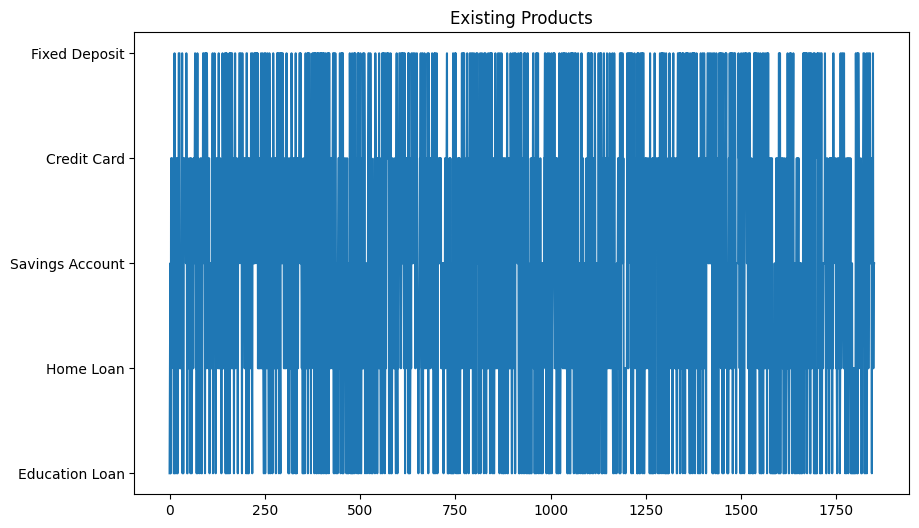

                            customer_id              name  age  gender  \
0  53c315b3-dd28-4a1d-9d50-6807955643c8       Tyrone Ward   18  Female   
1  0f7d81ad-5a41-40ea-8c3d-dd2e26c1d5a0     Jeremy Harris   24  Female   
2  f57772f5-2438-498f-a37f-96f65ca0cbcb      Daniel Novak   37  Female   
3  9a5f1281-80e2-45e8-b500-d0477567d71b         Adam Love   21    Male   
4  edefc0ee-09f6-4061-bf8a-26468ab04c8e  Johnny Stevenson   55  Female   

                            occupation  annual_income marital_status  \
0                          Optometrist      192818.49         Single   
1  Scientist, research (life sciences)      130447.09       Divorced   
2                          Proofreader      183662.03       Divorced   
3              Physiological scientist      119724.03         Single   
4                   Broadcast engineer      123540.24       Divorced   

   credit_score existing_products financial_goals     product_name  \
0           422    Education Loan       Education   

In [188]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    
    data_transformation = DataTransformation(config=data_transformation_config)
    data_transformation.join_datasets()
    data_transformation.transform_data()
except Exception as e:
    logger.error(f"Error in data transformation: {e}")
    raise  e